In [145]:
## EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import shap

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

%matplotlib inline

In [59]:
data = pd.read_excel("Saha_et_al_2020_ERL_Data.xlsx", sheet_name="Data")
data.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [60]:
# Checking the missing values
data.isnull().sum()

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

In [61]:
# Removing rows containing nan
data.dropna(subset = ["WFPS25cm","NH4","NO3"], inplace=True)
data.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2109 non-null   datetime64[ns]
 1   Year         2109 non-null   int64         
 2   Experiment   2109 non-null   object        
 3   DataUse      2109 non-null   object        
 4   Replication  2109 non-null   object        
 5   Month        2109 non-null   object        
 6   Vegetation   2109 non-null   object        
 7   VegType      2109 non-null   object        
 8   N2O          2109 non-null   float64       
 9   N_rate       2109 non-null   int64         
 10  PP2          2109 non-null   float64       
 11  PP7          2109 non-null   float64       
 12  AirT         2109 non-null   float64       
 13  DAF_TD       2109 non-null   int64         
 14  DAF_SD       2109 non-null   int64         
 15  WFPS25cm     2109 non-null   float64       
 16  NH4   

In [63]:
data.nunique()

Date           1276
Year             15
Experiment        3
DataUse           2
Replication       5
Month            12
Vegetation        3
VegType           1
N2O            1765
N_rate           16
PP2             219
PP7             461
AirT            579
DAF_TD          416
DAF_SD          409
WFPS25cm       1549
NH4            2079
NO3            2089
Clay             10
Sand              9
SOM              11
dtype: int64

In [64]:
data.drop(["Date","Experiment","DataUse", "Replication","VegType"], axis=1, inplace = True)
data.head()

,Year,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,February,Corn,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,February,Corn,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012,February,Corn,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012,February,Corn,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012,March,Corn,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [65]:
data.describe()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,2012.109056,6.274347,146.753438,5.225106,19.178842,12.160426,192.537221,195.661451,0.536946,11.482490,25.070701,131.411648,467.790718,1.892428
std,3.535864,22.179999,53.357108,10.086501,23.658690,9.549435,140.762373,137.575776,0.168230,13.092449,24.229970,80.438652,222.033355,1.140097
min,2002.000000,-7.415297,0.000000,0.000000,0.000000,-20.700000,1.000000,0.000000,0.024388,1.383393,0.370070,62.500000,55.000000,1.174072
25%,2011.000000,0.470000,135.000000,0.000000,3.560000,5.600000,73.000000,77.000000,0.390203,5.355167,11.601072,62.500000,418.833333,1.174072
50%,2013.000000,1.931364,170.000000,0.510000,12.000000,14.000000,160.000000,171.000000,0.563646,9.115526,20.504918,62.500000,637.500000,1.174072
75%,2014.000000,5.001703,170.000000,6.000000,27.000000,19.900000,305.000000,314.000000,0.681591,12.316032,27.143752,183.250000,637.500000,1.823200
max,2017.000000,593.072000,213.000000,95.250000,260.090000,30.700000,718.000000,678.000000,0.912113,228.525000,238.920000,280.000000,637.500000,4.500000


<AxesSubplot:xlabel='N2O', ylabel='Count'>

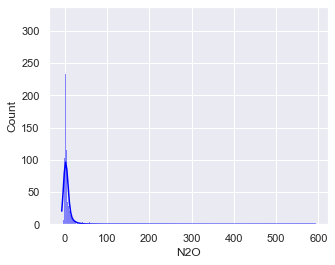

In [66]:
fig, ax = plt.subplots(figsize =(5, 4))
sns.histplot(data, x="N2O", kde=True, color= "blue")

In [67]:
data["N2O"].skew()

13.637333500078011

### Handling Skewness for the target class

In [68]:
min(data["N2O"])

-7.415296604408393

In [69]:
const = (abs(min(data["N2O"])) + 1) # so as to avoid neg values
const

8.415296604408393

In [70]:
#Log Transform
N2O_log_transform = np.log(data["N2O"] + const)
print("Skew : ",N2O_log_transform.skew())

Skew :  2.420239988445775


<AxesSubplot:xlabel='N2O', ylabel='Count'>

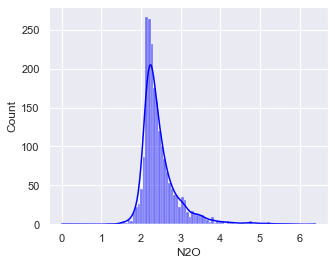

In [71]:
fig, ax = plt.subplots(figsize =(5, 4))
sns.histplot(data, x=N2O_log_transform, kde=True, color= "blue")

In [72]:
#Square Root Transform
N2O_sqrt_transform = np.sqrt(data["N2O"] + const)
print("Skew : ",N2O_sqrt_transform.skew())

Skew :  5.784686907796566


<AxesSubplot:xlabel='N2O', ylabel='Count'>

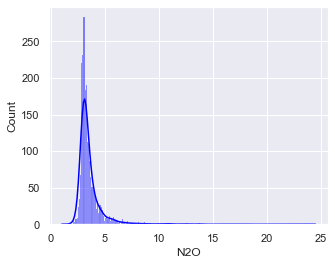

In [73]:
fig, ax = plt.subplots(figsize =(5, 4))
sns.histplot(data, x=N2O_sqrt_transform, kde=True, color= "blue")

In [74]:
# Box-Cox Transform
N2O_boxcox_transform, lambda_ = stats.boxcox(data["N2O"] + const)
N2O_boxcox_transform = pd.Series(N2O_boxcox_transform)
print("Skew : ",N2O_boxcox_transform.skew())
print("Lambda :",lambda_)

Skew :  -0.8513221002696681
Lambda : -0.647729673000535


<AxesSubplot:ylabel='Count'>

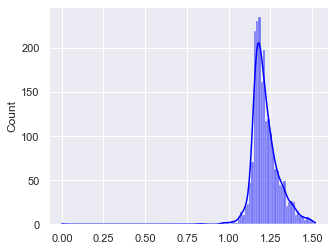

In [75]:
fig, ax = plt.subplots(figsize =(5, 4))
sns.histplot(data, x=N2O_boxcox_transform, kde=True, color= "blue")

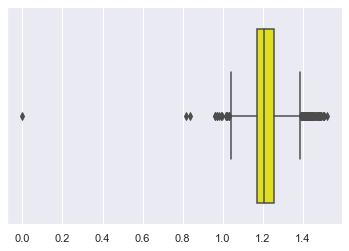

In [76]:
# Creating box-plot for N2O_boxcox_transform coloumn
ax = sns.boxplot(x=N2O_boxcox_transform, color= "yellow")

In [77]:
# After analysing we are finally performing log Transform on the target class
data_transformed = data.copy()
data_transformed = data_transformed.drop(["N2O"], axis=1)
data_transformed["N2O"] = N2O_log_transform
data_transformed.head()

,Year,Month,Vegetation,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,N2O
0,2012,February,Corn,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072,2.510578
1,2012,February,Corn,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072,2.361374
2,2012,February,Corn,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072,2.481391
3,2012,February,Corn,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072,2.464548
4,2012,March,Corn,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072,2.430369


### Analysing all the fields by visualizing them

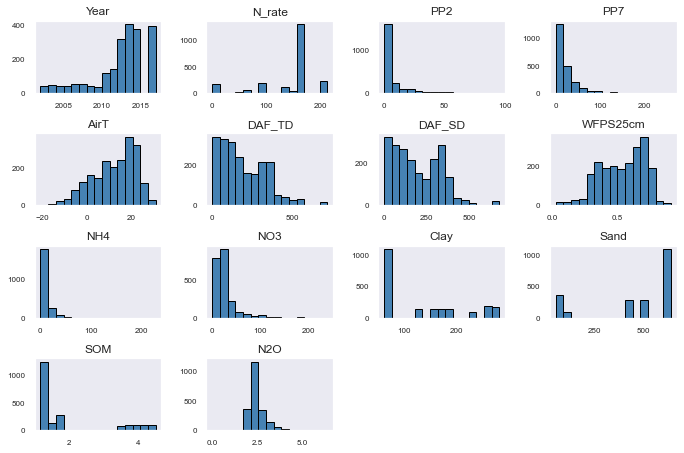

In [78]:
# Histogram of all the fields
data_transformed.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.6, 1.6))

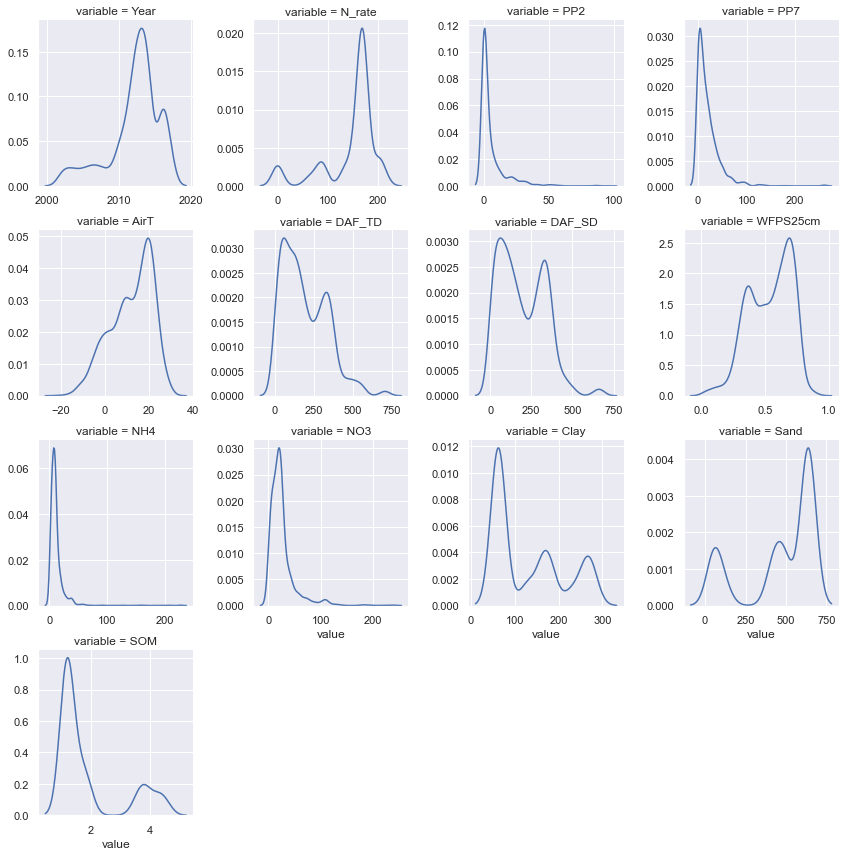

In [79]:
unpivot = pd.melt(data_transformed, data_transformed.describe().columns[-1], data_transformed.describe().columns[:-1])
g = sns.FacetGrid(unpivot, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

C:\Users\DIPTARAJ SEN\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


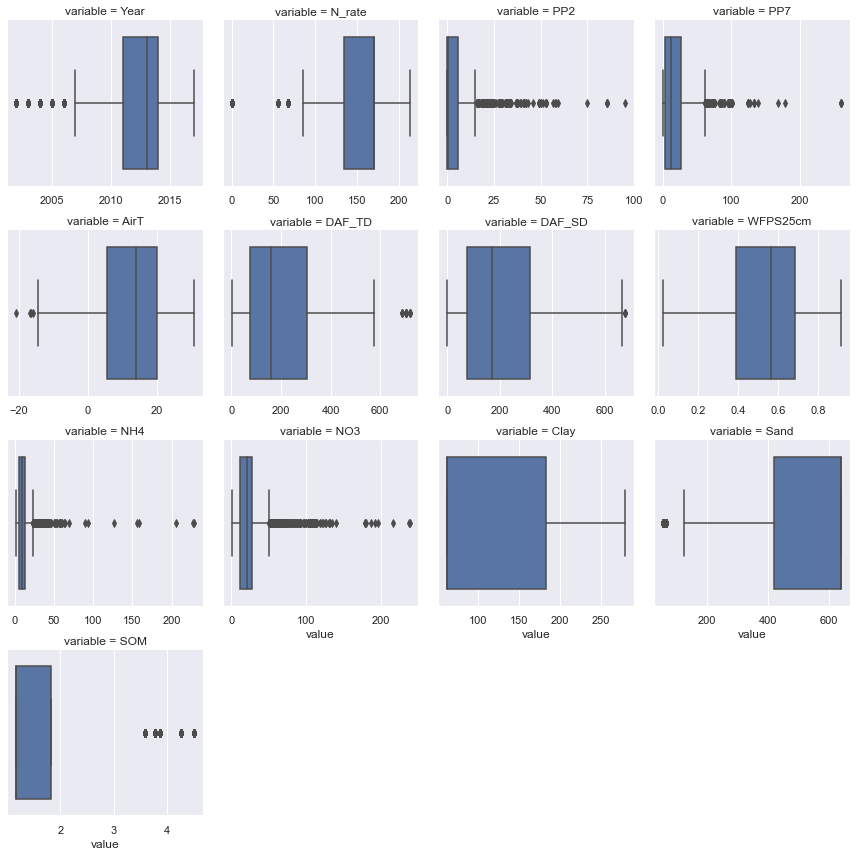

In [80]:
unpivot = pd.melt(data_transformed, data_transformed.describe().columns[-1], data_transformed.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [81]:
# Feature and Target splits
X_transformed = data_transformed.drop(["N2O"], axis=1)
y_transformed = data_transformed["N2O"]

In [82]:
# Boxcox transformation for all the majorly skewed fetaures
cols_ = ["PP2","PP7","NH4","NO3"]
for ele in cols_:
    const = abs(min(X_transformed[ele])) + 1
    X_transformed[ele] = np.log(data_transformed["N2O"] + const)
    print(ele)
    print("Skew :",X_transformed[ele].skew())

PP2
Skew : 1.1804593374705705
PP7
Skew : 1.1804593374705705
NH4
Skew : 1.6178752174039324
NO3
Skew : 1.3567396270619767


<AxesSubplot:>

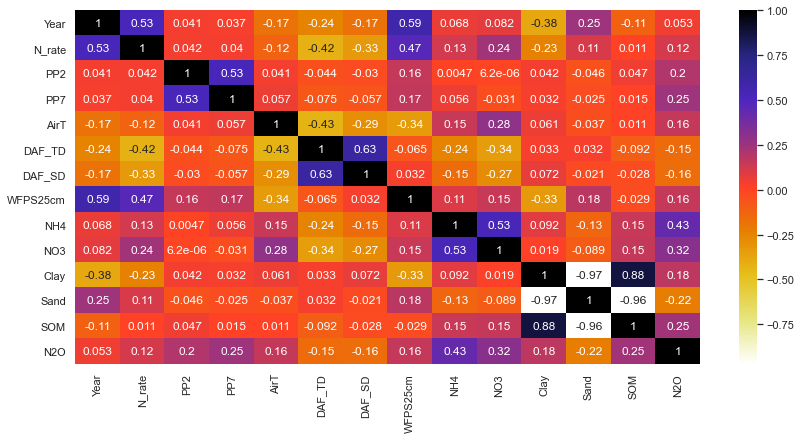

In [83]:
# Correlation Matrix Heatmap
plt.figure(figsize=(14,6.5))
sns.set()
sns.heatmap(data_transformed.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [84]:
# SOM and Clay have suffienctly high correlation so we are dropping Clay
data_transformed = data_transformed.drop(["Clay"], axis=1)
data_transformed.head()

,Year,Month,Vegetation,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Sand,SOM,N2O
0,2012,February,Corn,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,637.5,1.174072,2.510578
1,2012,February,Corn,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,637.5,1.174072,2.361374
2,2012,February,Corn,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,637.5,1.174072,2.481391
3,2012,February,Corn,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,637.5,1.174072,2.464548
4,2012,March,Corn,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,637.5,1.174072,2.430369


In [86]:
X_transformed = data_transformed.drop(["N2O"], axis=1)
X_transformed.head()

,Year,Month,Vegetation,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Sand,SOM
0,2012,February,Corn,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,637.5,1.174072
1,2012,February,Corn,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,637.5,1.174072
2,2012,February,Corn,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,637.5,1.174072
3,2012,February,Corn,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,637.5,1.174072
4,2012,March,Corn,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,637.5,1.174072


In [87]:
y_transformed.head()

0    2.510578
1    2.361374
2    2.481391
3    2.464548
4    2.430369
Name: N2O, dtype: float64

In [88]:
#Calculating Inter-Quartile Range(IQR)
Q1 = X_transformed.quantile(0.25)
Q3 = X_transformed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year          3.000000
N_rate       35.000000
PP2           6.000000
PP7          23.440000
AirT         14.300000
DAF_TD      232.000000
DAF_SD      237.000000
WFPS25cm      0.291388
NH4           6.960865
NO3          15.542680
Sand        218.666667
SOM           0.649128
dtype: float64


In [89]:
data_transformed_iqr = data_transformed[~((data_transformed < (Q1 - 1.5 * IQR)) | (data_transformed > (Q3 + 1.5 * IQR))).any(axis=1)]
data_transformed_iqr.shape

<ipython-input-89-4ca7577b8236>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_transformed_iqr = data_transformed[~((data_transformed < (Q1 - 1.5 * IQR)) | (data_transformed > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-89-4ca7577b8236>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_transformed_iqr = data_transformed[~((data_transformed < (Q1 - 1.5 * IQR)) | (data_transformed > (Q3 + 1.5 * IQR))).any(axis=1)]


(1030, 15)

In [90]:
data_transformed_iqr = data_transformed_iqr.reset_index().drop(["index"], axis=1)
data_transformed_iqr

,Year,Month,Vegetation,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Sand,SOM,N2O
0,2012,February,Corn,170,0.00,0.00,-2.00,276,241,0.666508,11.046340,22.940812,637.500000,1.174072,2.510578
1,2012,February,Corn,170,0.00,0.00,-2.40,277,242,0.640608,11.008087,22.959578,637.500000,1.174072,2.361374
2,2012,February,Corn,170,3.30,8.64,0.30,285,250,0.728085,10.831669,23.221928,637.500000,1.174072,2.481391
3,2012,February,Corn,170,0.00,8.13,-3.80,286,251,0.686872,10.849792,23.271978,637.500000,1.174072,2.464548
4,2012,March,Corn,170,1.02,8.39,17.60,312,277,0.716221,10.204748,24.206855,637.500000,1.174072,2.430369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2013,October,TRIAE,91,3.81,8.13,10.81,167,167,0.390203,17.061793,5.803681,491.666667,1.806000,2.308100
1026,2013,November,TRIAE,91,0.00,8.13,5.64,197,197,0.317040,5.624730,5.429873,490.375000,1.496400,2.241273
1027,2013,November,TRIAE,91,0.00,8.13,5.64,197,197,0.341428,3.504328,7.239000,432.875000,1.186800,2.105998
1028,2013,November,TRIAE,91,0.00,8.13,5.64,197,197,0.365815,3.636931,8.434294,418.833333,1.823200,2.165080


C:\Users\DIPTARAJ SEN\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


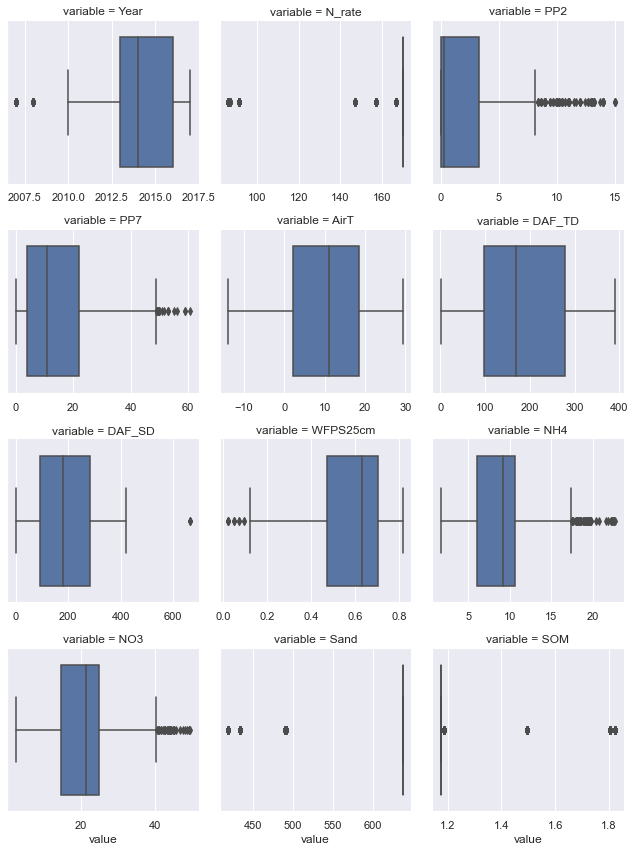

In [91]:
unpivot = pd.melt(data_transformed_iqr, data_transformed_iqr.describe().columns[-1], data_transformed_iqr.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [92]:
data_transformed.head()

,Year,Month,Vegetation,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Sand,SOM,N2O
0,2012,February,Corn,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,637.5,1.174072,2.510578
1,2012,February,Corn,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,637.5,1.174072,2.361374
2,2012,February,Corn,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,637.5,1.174072,2.481391
3,2012,February,Corn,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,637.5,1.174072,2.464548
4,2012,March,Corn,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,637.5,1.174072,2.430369


In [93]:
month = data_transformed["Month"]
vegetation = data_transformed["Vegetation"]

data_transformed = data_transformed.drop(["Month","Vegetation"], axis=1)

z = np.abs(stats.zscore(data_transformed)) 
print(z)

[[0.03085025 0.43578216 0.51815248 ... 0.76452266 0.63023314 0.0748631 ]
 [0.03085025 0.43578216 0.51815248 ... 0.76452266 0.63023314 0.22348514]
 [0.03085025 0.43578216 0.19090495 ... 0.76452266 0.63023314 0.01650234]
 ...
 [0.25203315 1.04515898 0.51815248 ... 0.15729168 0.61906652 0.73413727]
 [0.25203315 1.04515898 0.51815248 ... 0.22054793 0.06073589 0.61599677]
 [0.25203315 1.04515898 0.51815248 ... 0.10755866 0.07582591 0.59318375]]


In [94]:
data_transformed_zscore = data_transformed[(z < 3).all(axis=1)]
data_transformed_zscore.shape

(1919, 13)

C:\Users\DIPTARAJ SEN\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


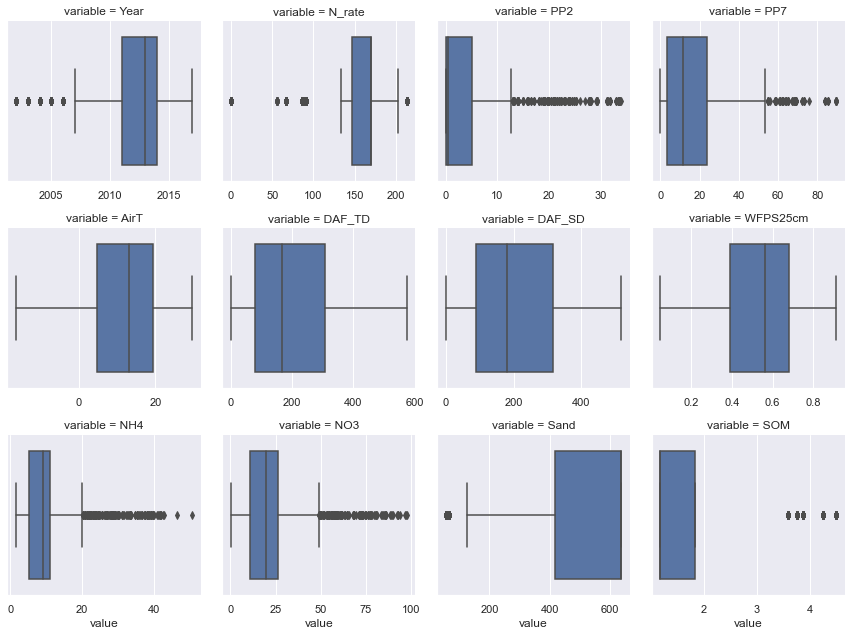

In [96]:
unpivot = pd.melt(data_transformed_zscore, data_transformed_zscore.describe().columns[-1], data_transformed_zscore.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [105]:
data_transformed = data_transformed_zscore
data_transformed["Month"] = month
data_transformed["Vegetation"] = vegetation
data_transformed = pd.get_dummies(data_transformed)
data_transformed.head()

,Year,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,...,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Vegetation_Corn,Vegetation_GLYMX,Vegetation_TRIAE
0,2012,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,...,0,0,0,0,0,0,0,1,0,0
1,2012,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,...,0,0,0,0,0,0,0,1,0,0
2,2012,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,...,0,0,0,0,0,0,0,1,0,0
3,2012,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,...,0,0,0,0,0,0,0,1,0,0
4,2012,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,...,0,0,1,0,0,0,0,1,0,0


In [106]:
data_transformed.shape

(1919, 28)

In [107]:
X_transformed = data_transformed.drop(["N2O"], axis=1)
y_transformed = data_transformed["N2O"]

In [108]:
X_transformed

,Year,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,...,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Vegetation_Corn,Vegetation_GLYMX,Vegetation_TRIAE
0,2012,170,0.00,0.00,-2.00,276,241,0.666508,11.046340,22.940812,...,0,0,0,0,0,0,0,1,0,0
1,2012,170,0.00,0.00,-2.40,277,242,0.640608,11.008087,22.959578,...,0,0,0,0,0,0,0,1,0,0
2,2012,170,3.30,8.64,0.30,285,250,0.728085,10.831669,23.221928,...,0,0,0,0,0,0,0,1,0,0
3,2012,170,0.00,8.13,-3.80,286,251,0.686872,10.849792,23.271978,...,0,0,0,0,0,0,0,1,0,0
4,2012,170,1.02,8.39,17.60,312,277,0.716221,10.204748,24.206855,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2013,91,3.81,8.13,10.81,167,167,0.390203,17.061793,5.803681,...,0,0,0,0,0,1,0,0,0,1
2242,2013,91,0.00,8.13,5.64,197,197,0.317040,5.624730,5.429873,...,0,0,0,0,1,0,0,0,0,1
2243,2013,91,0.00,8.13,5.64,197,197,0.341428,3.504328,7.239000,...,0,0,0,0,1,0,0,0,0,1
2244,2013,91,0.00,8.13,5.64,197,197,0.365815,3.636931,8.434294,...,0,0,0,0,1,0,0,0,0,1


In [109]:
y_transformed

0       2.510578
1       2.361374
2       2.481391
3       2.464548
4       2.430369
          ...   
2241    2.308100
2242    2.241273
2243    2.105998
2244    2.165080
2245    2.176488
Name: N2O, Length: 1919, dtype: float64

### Feature Selection

In [114]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.33, random_state=1)

X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

Feature 0: 6.546753
Feature 1: 8.223349
Feature 2: 19.837556
Feature 3: 31.120717
Feature 4: 21.490745
Feature 5: 9.800572
Feature 6: 6.945085
Feature 7: 5.147018
Feature 8: 184.664310
Feature 9: 104.624220
Feature 10: 56.033101
Feature 11: 71.252058
Feature 12: 2.622192
Feature 13: 0.000354
Feature 14: 13.337788
Feature 15: 6.383972
Feature 16: 0.175799
Feature 17: 97.253149
Feature 18: 6.890961
Feature 19: 0.011323
Feature 20: 1.084471
Feature 21: 17.795089
Feature 22: 23.124197
Feature 23: 25.591256
Feature 24: 17.504738
Feature 25: 7.641788
Feature 26: 8.366522


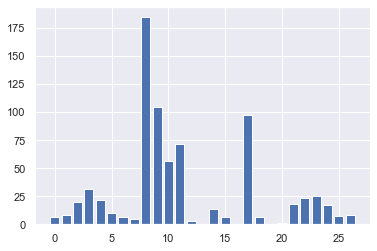

Feature 0: 0.117985
Feature 1: 0.106628
Feature 2: 0.043486
Feature 3: 0.040653
Feature 4: 0.022422
Feature 5: 0.163111
Feature 6: 0.171610
Feature 7: 0.080418
Feature 8: 0.128609
Feature 9: 0.133442
Feature 10: 0.106209
Feature 11: 0.107753
Feature 12: 0.000000
Feature 13: 0.000773
Feature 14: 0.013996
Feature 15: 0.004283
Feature 16: 0.012532
Feature 17: 0.031122
Feature 18: 0.000000
Feature 19: 0.007072
Feature 20: 0.010990
Feature 21: 0.003476
Feature 22: 0.010478
Feature 23: 0.018037
Feature 24: 0.063093
Feature 25: 0.037709
Feature 26: 0.017564


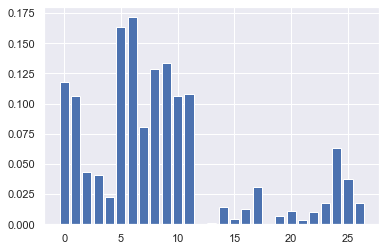

In [116]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.scores_)):
        print('Feature %d: %f' % (i, fs_func.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs_func.scores_))], fs_func.scores_)
    plt.show()
    
fs_score_plot(fs_corr)
fs_score_plot(fs_info)

### Modelling

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.33, random_state=1)

X_train_fs, X_test_fs, fs_info = select_features_infogain_based(X_train, y_train, X_test, x=9)

### LinearRegression

In [124]:
lreg = LinearRegression()

lreg.fit(X_train_fs, y_train)

yhat = lreg.predict(X_test_fs)

In [125]:
mae_linear = mean_absolute_error(y_test, yhat)
mse_linear = mean_squared_error(y_test, yhat)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 0.241
MSE: 0.113
RMSE: 0.335
R-Square: 0.168


### RandomForest Regression

In [126]:
rf = RandomForestRegressor()

rf.fit(X_train_fs, y_train)
    
yhat = rf.predict(X_test_fs)

In [127]:
mae_rf = mean_absolute_error(y_test, yhat)
mse_rf = mean_squared_error(y_test, yhat)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 0.167
MSE: 0.063
RMSE: 0.251
R-Square: 0.535


### Decision Tree Regression

In [128]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_fs, y_train)

yhat = dtree.predict(X_test_fs)

In [129]:
mae_dt = mean_absolute_error(y_test, yhat)
mse_dt = mean_squared_error(y_test, yhat)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 0.215
MSE: 0.102
RMSE: 0.320
R-Square: 0.242


### XGBRegression

In [130]:
xgb = XGBRegressor()

xgb.fit(X_train_fs, y_train)

yhat = xgb.predict(X_test_fs)

In [131]:
mae_xgb = mean_absolute_error(y_test, yhat)
mse_xgb = mean_squared_error(y_test, yhat)
rmse_xgb = np.sqrt(mse_dt)
rsq_xgb = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 0.177
MSE: 0.069
RMSE: 0.320
R-Square: 0.492


### Model Evaluation

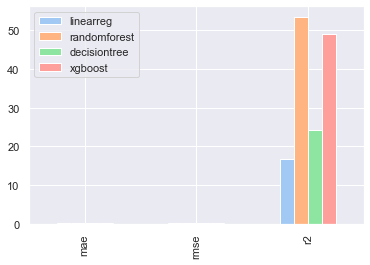

In [133]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

### Hyperparameter Tuning

In [134]:
cv = RepeatedKFold(n_splits= 50, n_repeats = 3, random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)


# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])

# pipe_lr.get_params().keys()

In [135]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        'model__criterion': ['mse', 'mae'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
                    'model__criterion': ['mse', 'mae'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]



LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Linear Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [136]:
# Start form initial scaled model: X_train17 and X_test17, y_train17 and y_test17
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs, y_train)
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fs)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    
    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))
    
    return (grid_dict[best_regr], best_gs, least_mae)

### Prediction and Evaluation

In [137]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Linear Regression
Best Config: {'sel__k': 4}
Best MAE: -0.249
Test set mean absolute error for best params: 0.247 
Test set root mean squared error for best params: 0.497 

Estimator: Random Forest
Best Config: {'model__criterion': 'mse', 'sel__k': 4}
Best MAE: -0.197
Test set mean absolute error for best params: 0.187 
Test set root mean squared error for best params: 0.432 

Estimator: XGBoost
Best Config: {'model__subsample': 0.9, 'sel__k': 4}
Best MAE: -0.210
Test set mean absolute error for best params: 0.202 
Test set root mean squared error for best params: 0.449 

Estimator: Decision Tree
Best Config: {'model__criterion': 'mae', 'sel__k': 4}
Best MAE: -0.251
Test set mean absolute error for best params: 0.247 
Test set root mean squared error for best params: 0.497 

Classifier with least test set MAE: Random Forest
Best Model: Random Forest
Error Rate: 0.18660383543973524
GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=50, rand

In [138]:
grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=8)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fs, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))
        

Random Forest V-1 optimising...
Best Config: {'model__max_depth': 15, 'model__min_samples_split': 2}
Best MAE: -0.182
Test set mean absolute error for best params: 0.170 
Test set root mean squared error for best params: 0.412 


### Model Explainability (Explainable AI)

In [139]:
# in the above cells, fit the model with the returned params from the gsearchCV
# and then passit to the shap arguements

fs_rf = SelectKBest(score_func=mutual_info_regression, k=8)
fs_rf.fit(X_train,y_train)
X_train_rf = fs_rf.transform(X_train)
X_test_rf = fs_rf.transform(X_test)
rf_final = RandomForestRegressor(max_depth = 15, min_samples_split = 2, criterion = 'mse')

rf_final.fit(X_train_rf, y_train)
rf_pred = rf_final.predict(X_test_rf)

In [140]:
print(mean_absolute_error(y_test, rf_pred))
print(np.sqrt(mean_squared_error(y_test, rf_pred)))

0.1698421191522158
0.2492441545835792


In [141]:
# fs.get_support() will return boolean values in a list, with True at the 'k' specific selected features

feature_columns = [X_transformed.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]]
feature_columns

['Year', 'N_rate', 'DAF_TD', 'DAF_SD', 'NH4', 'NO3', 'Sand', 'SOM']

In [142]:
# using the above line of code to create a dataframe
# fs.transform will return the np.array() values and fs.get_support() will have the columns

pd.DataFrame(X_test_rf, columns=[X_transformed.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

,Year,N_rate,DAF_TD,DAF_SD,NH4,NO3,Sand,SOM
0,2012.0,170.0,82.0,48.0,8.401561,79.987993,637.500000,1.174072
1,2011.0,135.0,24.0,24.0,21.257500,22.165000,65.000000,3.583333
2,2012.0,56.0,143.0,109.0,2.204753,1.269484,60.000000,4.250000
3,2013.0,170.0,251.0,217.0,8.809799,26.433274,637.500000,1.174072
4,2013.0,170.0,137.0,100.0,4.605219,14.926775,637.500000,1.174072
...,...,...,...,...,...,...,...,...
629,2004.0,90.0,286.0,95.0,8.714441,7.076515,418.833333,1.823200
630,2013.0,170.0,239.0,202.0,9.129983,19.555396,637.500000,1.174072
631,2002.0,162.0,33.0,389.0,10.731500,35.782250,418.833333,1.823200
632,2009.0,0.0,491.0,454.0,3.448050,3.778250,490.375000,1.496400


In [146]:
# Creating dataframe for test set of attributes, so that feature columns can be visible in the plot

X_test_rf_df = pd.DataFrame(X_test_rf, columns=[X_transformed.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

shap_values = shap.TreeExplainer(rf_final).shap_values(X_test_rf_df)
shap_interaction_values = shap.TreeExplainer(rf_final).shap_interaction_values(X_test_rf_df)

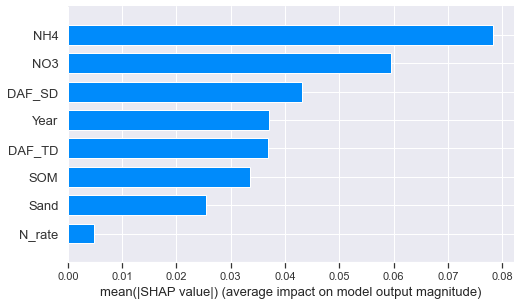

In [147]:
# summary plot of XGB test set as the impact value
shap.summary_plot(shap_values, X_test_rf_df, plot_type="bar")

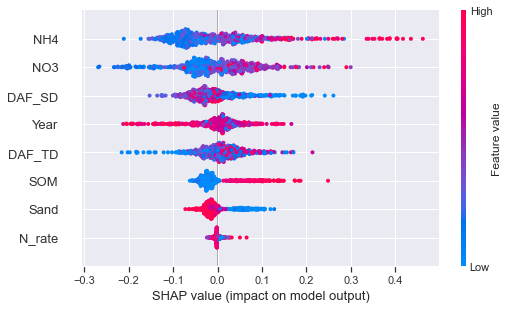

In [148]:
# BeeSwarm plot of the features based on impact on specific values

shap.summary_plot(shap_values, X_test_rf_df)

In [149]:
shap.initjs()

shap.force_plot(shap.TreeExplainer(rf_final).expected_value, shap_values[50,0:-3], X_test_rf_df.iloc[50,0:-3])

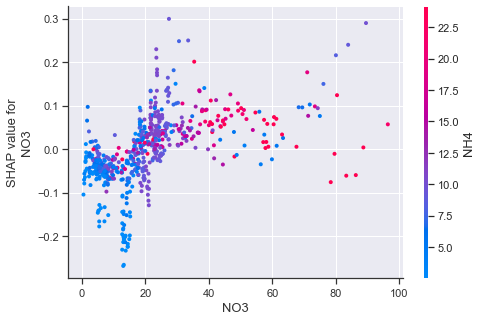

In [150]:
shap.dependence_plot(5, shap_values, X_test_rf_df) # should be 1-7 as we have 8 features

### Saving Models and Backup Objects

In [154]:
# Save best grid search pipeline to file
dump_file_name = 'lreg_N2O_tuned_model.pkl'
joblib.dump(best_model_v0, dump_file_name, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % (best_model_name_v0, dump_file_name))
    
# Save the random forest grid search pipleline for backup
dump_file_name1 = 'rf_N2O_tuned_model.pkl'
joblib.dump(rf_final, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))


Saved Random Forest tuned model to directory by name: lreg_N2O_tuned_model.pkl

Saved Random Forest tuned model to directory by name: rf_N2O_tuned_model.pkl


In [155]:
# # Save feature selection objects for backup
joblib.dump(fs_rf, "rf_fs_object.joblib", compress=1)
print("\n Saved %s to %s" % ("Randomforest fs object", "rf_fs_object.joblib"))


X_test_rf_df.to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

joblib.dump(X_train_rf, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")



 Saved Randomforest fs object to rf_fs_object.joblib

Saved X_test for RF to CSV

 Saved X_train for RF to joblib file


In [156]:
# # Save the target test set
joblib.dump(y_test, "y_test.joblib", compress=1)
print("\nSaved y_test to joblib file")


Saved y_test to joblib file
